In [110]:
import gymnasium as gym
from stable_baselines3 import PPO, DQN, SAC, TD3, A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.vec_env import VecMonitor

env = make_vec_env("BipedalWalker-v3", n_envs=8)
env = VecMonitor(env, filename="bipedalwalker-a2c")

# hyperparameter adopted from https://huggingface.co/sb3/a2c-BipedalWalker-v3
model = A2C(
    "MlpPolicy",
    env=env,
    ent_coef=0.0,
    gae_lambda=0.9,
    gamma=0.99,
    learning_rate=0.00096,
    max_grad_norm=0.5,
    normalize_advantage=False,
    use_rms_prop=True,
    use_sde=True,
    vf_coef=0.4,
)

model.learn(total_timesteps=300000)

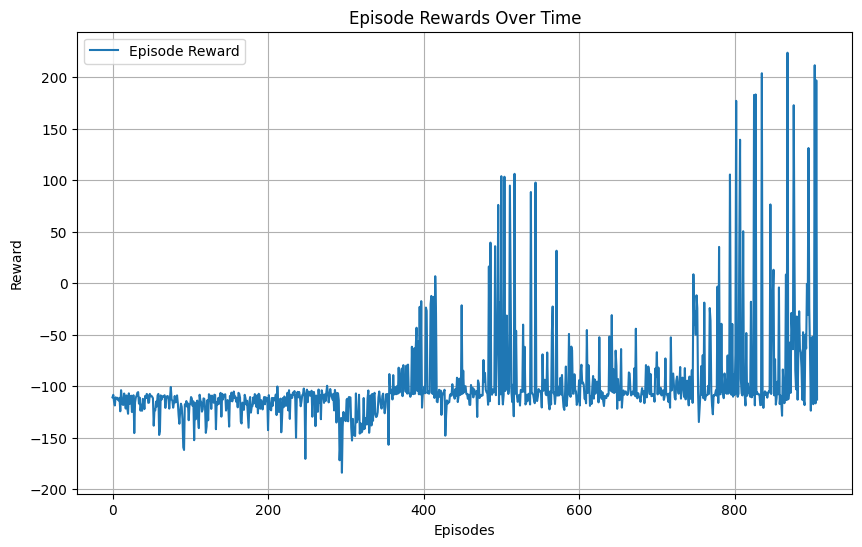

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

log_file = "bipedalwalker-a2c.monitor.csv"
data = pd.read_csv(log_file, skiprows=1)
episode_rewards = data["r"]

plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label="Episode Reward")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Episode Rewards Over Time")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# visualize BipedalWalker
vec_env = make_vec_env("BipedalWalker-v3", n_envs=1)
obs = vec_env.reset()

for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)
    vec_env.render("human")